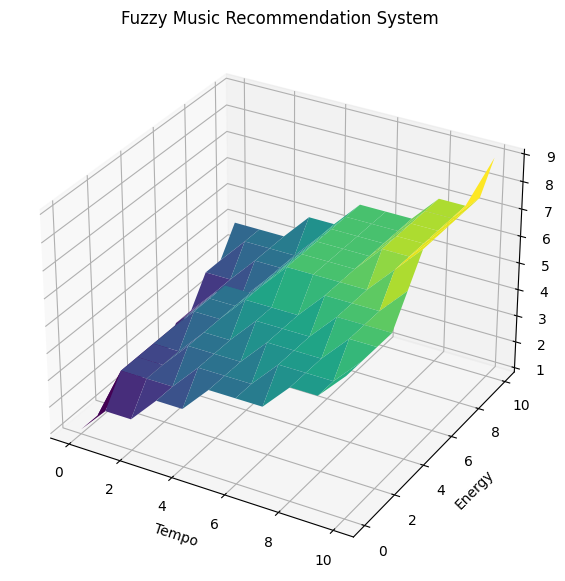

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy variables
tempo = ctrl.Antecedent(np.arange(0, 11, 1), 'tempo')
energy = ctrl.Antecedent(np.arange(0, 11, 1), 'energy')
genre = ctrl.Consequent(np.arange(0, 11, 1), 'genre')

# Generate membership functions for tempo
tempo['slow'] = fuzz.trimf(tempo.universe, [0, 0, 5])
tempo['medium'] = fuzz.trimf(tempo.universe, [0, 5, 10])
tempo['fast'] = fuzz.trimf(tempo.universe, [5, 10, 10])

# Generate membership functions for energy
energy['low'] = fuzz.trimf(energy.universe, [0, 0, 5])
energy['medium'] = fuzz.trimf(energy.universe, [0, 5, 10])
energy['high'] = fuzz.trimf(energy.universe, [5, 10, 10])

# Generate membership functions for genre
genre['chillout'] = fuzz.trimf(genre.universe, [0, 0, 3])
genre['pop'] = fuzz.trimf(genre.universe, [1, 4, 7])
genre['rock'] = fuzz.trimf(genre.universe, [3, 6, 9])
genre['metal'] = fuzz.trimf(genre.universe, [6, 9, 10])
genre['classical'] = fuzz.trimf(genre.universe, [7, 10, 10])

# Define rules
rule1 = ctrl.Rule(tempo['slow'] & energy['low'], genre['chillout'])
rule2 = ctrl.Rule(tempo['slow'] & energy['medium'], genre['chillout'])
rule3 = ctrl.Rule(tempo['slow'] & energy['high'], genre['pop'])
rule4 = ctrl.Rule(tempo['medium'] & energy['low'], genre['pop'])
rule5 = ctrl.Rule(tempo['medium'] & energy['medium'], genre['rock'])
rule6 = ctrl.Rule(tempo['medium'] & energy['high'], genre['rock'])
rule7 = ctrl.Rule(tempo['fast'] & energy['low'], genre['rock'])
rule8 = ctrl.Rule(tempo['fast'] & energy['medium'], genre['metal'])
rule9 = ctrl.Rule(tempo['fast'] & energy['high'], genre['classical'])

# Create control system
music_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
music_recommendation = ctrl.ControlSystemSimulation(music_ctrl)

# Generate surface plot
tempo_range = np.arange(0, 11, 1)
energy_range = np.arange(0, 11, 1)
X, Y = np.meshgrid(tempo_range, energy_range)
Z = np.zeros_like(X)

for i in range(11):
    for j in range(11):
        music_recommendation.input['tempo'] = X[i, j]
        music_recommendation.input['energy'] = Y[i, j]
        music_recommendation.compute()
        Z[i, j] = music_recommendation.output['genre']

# Plot the surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Tempo')
ax.set_ylabel('Energy')
ax.set_zlabel('Genre')
ax.set_title('Fuzzy Music Recommendation System')

plt.show()

In [7]:
!pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=9f17faa8eeee2c9de240cc2124cf7cc64aee95a84d5841f553679e95ca251722
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
